In [62]:
import requests
import pandas as pd  # for data manipulation
from pandas import json_normalize
import seaborn as sns  # for data visualization Seaborn (built on Matplotlib).
import plotly.express as px

## Set Variables
### Gather all the data from the Strava API
### Setup the variables for Authentication

In [63]:
CLIENT_ID = 'XXXXXX'  # use your own ID from "https://www.strava.com/settings/api"
CLIENT_SECRET = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'  # use your own secret from "https://www.strava.com/settings/api"
REFRESH_TOKEN = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'  # use your own token which was aquired from the step "Exchange authorization code for access token & refresh token"

### Setup the variables for Data Exploration Analyzis

In [64]:
DATA_COLUMNS = ['name', 'distance', 'moving_time', 'total_elevation_gain', 'type', 'id',
                'start_date_local', 'achievement_count', 'average_speed', 'max_speed', 'average_cadence',
                'average_watts', 'max_watts', 'weighted_average_watts', 'kilojoules',
                'average_heartrate', 'max_heartrate', 'elev_high', 'elev_low', 'upload_id']
PERFORMANCE_COLUMNS = ['distance', 'moving_time', 'elev_gain', 'speed_avg', 'speed_max', 'hr_avg', 'hr_max']
BIKING_ACTIVITY_TYPES = ['Ride', 'VirtualRide']  # I mainly do cycling indoor and outdoor so I check only these activities
WALKING_ACTIVITY_TYPES = ['Walk', 'Hike']  # If you would like to check other activities
RUNING_ACTIVITY_TYPES = ['Run']  # If you would like to check other activities
CHART_WIDTH = 800
CHART_HEIGHT = 400

### Authenticate and download all data from Strava with the API

In [65]:
auth_url = "https://www.strava.com/oauth/token"  # authentication endpoint
activites_url = "https://www.strava.com/api/v3/athlete/activities"

payload = {
    'client_id': CLIENT_ID,
    'client_secret': CLIENT_SECRET,
    'refresh_token': REFRESH_TOKEN,
    'grant_type': "refresh_token",
    'f': 'json'
}

print("Requesting Token...\n")
res = requests.post(auth_url, data=payload)
access_token = res.json()['access_token']
print("Access Token = {}\n".format(access_token))

header = {'Authorization': 'Bearer ' + access_token}  # setting up the authorization header

request_page_num = 1
activity_sum = 0

all_activities = []

while True:
    param = {'per_page': 200, 'page': request_page_num}
    # initial request, where I request the first page of activities
    my_dataset = requests.get(activites_url, headers=header, params=param).json()
    print(len(my_dataset))
    activity_sum += len(my_dataset)

    # check if the request response is not empty
    if len(my_dataset) == 0:
        print(f"All {activity_sum} activities exported!")
        break

    # If there is information in the array we would like to extend
    if all_activities:
        print("all_activities is populated")
        all_activities.extend(my_dataset)
    else:
        print("all_activities is empty")
        all_activities = my_dataset

    request_page_num += 1

print(len(all_activities))

# this is just to check and count of the activities with the enumerate function to get the indexes
for count, activity in enumerate(all_activities):
    print(activity["name"])
    print(count)

Requesting Token...

Access Token = 25ab2a8c2b02071dcf569a6de15b113a55401c7d



200
all_activities is empty
176
all_activities is populated
0
All 376 activities exported!
376
Evening Ride
0
Afternoon Ride
1
Zwift - Foundation in France
2
Morning Hike
3
Lunch Hike
4
Morning Hike
5
Zwift - At/Overs in London
6
Zwift - Strength in Paris
7
Zwift - Group Ride: Alpe du Zwift Hungary on Road to Sky in Watopia
8
Zwift - Foundation in France
9
Zwift - Zone Benchmarking in France
10
Zwift - Road to Sky in Watopia
11
Zwift - Workout of the Week | Uphill Battle on Triple Loops in France
12
Zwift - Zwift Pro Training Camp: Jumbo-Visma | Men's Team on Volcano Climb in France
13
Zwift - Group Ride: Alpe du Zwift Hungary on Road to Sky in Watopia
14
Zwift - Steeper & Steeper on Tour of Fire and Ice in Watopia
15
Zwift - Zwift Pro Training Camp: Team BikeExchange-Jayco | Jesse Allen on Achterbahn in France
16
Zwift - INEOS Grenadiers Virtual Training Camp | The Pidcock in Innsbruck
17
Zwift - Race: INC RELENTLESS Sprint Series Race 2 (C) on Downtown Dolphin in Crit City
18
Zwift -

## Examine and clean the data

### Take all data to a dataframe

In [66]:
# Convert the list of activities to a pandas DataFrame
activities = json_normalize(all_activities)

# Check the structure
print(activities)

     resource_state                          name  distance  moving_time  \
0                 2                  Evening Ride   20840.0         4060   
1                 2                Afternoon Ride   13780.2         2678   
2                 2  Zwift - Foundation in France   25024.9         3015   
3                 2                  Morning Hike    9188.7         9550   
4                 2                    Lunch Hike    5036.0         5861   
..              ...                           ...       ...          ...   
371               2                    Night Ride      95.5           19   
372               2                  Morning Ride     587.1          134   
373               2                  Morning Ride    1036.6          244   
374               2                  Evening Ride   13342.5         3272   
375               2                  Evening Ride    8922.7         2464   

     elapsed_time  total_elevation_gain         type   sport_type  \
0            4149 

### Examine it

In [67]:
# Check the columns
activities.columns

Index(['resource_state', 'name', 'distance', 'moving_time', 'elapsed_time',
       'total_elevation_gain', 'type', 'sport_type', 'workout_type', 'id',
       'start_date', 'start_date_local', 'timezone', 'utc_offset',
       'location_city', 'location_state', 'location_country',
       'achievement_count', 'kudos_count', 'comment_count', 'athlete_count',
       'photo_count', 'trainer', 'commute', 'manual', 'private', 'visibility',
       'flagged', 'gear_id', 'start_latlng', 'end_latlng', 'average_speed',
       'max_speed', 'average_watts', 'kilojoules', 'device_watts',
       'has_heartrate', 'average_heartrate', 'max_heartrate',
       'heartrate_opt_out', 'display_hide_heartrate_option', 'elev_high',
       'elev_low', 'upload_id', 'upload_id_str', 'external_id',
       'from_accepted_tag', 'pr_count', 'total_photo_count', 'has_kudoed',
       'athlete.id', 'athlete.resource_state', 'map.id',
       'map.summary_polyline', 'map.resource_state', 'average_cadence',
       'max_watts

In [68]:
# Check the dataframe size
activities.shape

(376, 59)

## Export data as csv

In [69]:
activities.to_csv('dataset\\strava_data.csv', index=False, mode='w')

## Exploratory Data Analysis (EDA)

Creating dataframes and filter correct transform data.

In [70]:
def keep_columns(df, col):
    """
    Keep only specified columns in the DataFrame.

    Parameters:
    - df (DataFrame): The input DataFrame.
    - col (list): A list of column names to keep.

    Returns:
    - DataFrame: DataFrame containing only the specified columns.
    """

    return df[col]


def keep_rows(df, type):
    """
    Keep only rows of specified types in the DataFrame.

    Parameters:
    - df (DataFrame): The input DataFrame.
    - type (list): A list of activity types to keep.

    Returns:
    - DataFrame: DataFrame containing only the rows with specified activity types.
    """

    return df[df['type'].isin(type)]


def transform_data(df):
    """
    Transform data in the DataFrame.

    Parameters:
    - df (DataFrame): The input DataFrame.

    Returns:
    - DataFrame: DataFrame with transformed data.
    """

    # Convert 'start_date_local' to date format and extract date
    df['date'] = pd.to_datetime(df['start_date_local']).dt.date.astype(str)
    # Convert distance from meters to kilometers and round to 2 decimal places
    df['distance'] = round(df['distance'] / 1000, 2)
    # Convert max_speed from m/s to km/h and round to 2 decimal places
    df['max_speed'] = round(df['max_speed'] * 3.6, 2)
    # Convert average_speed from m/s to km/h and round to 2 decimal places
    df['average_speed'] = round(df['average_speed'] * 3.6, 2)
    # Convert moving_time from seconds to minutes and round to nearest whole number
    df['moving_time'] = round(df["moving_time"] / 60, 0)
    # Convert 'start_date_local' to datetime format
    df['start_date_local'] = pd.to_datetime(df['start_date_local'])
    # Extract start time from 'start_date_local'
    df['start_time'] = df['start_date_local'].dt.time
    # Round average_heartrate to nearest whole number
    df['average_heartrate'] = round(df['average_heartrate'], 0)
    return df


def rename_columns(df):
    """
    Rename columns in the DataFrame.

    Parameters:
    - df (DataFrame): The input DataFrame.

    Returns:
    - DataFrame: DataFrame with renamed columns.
    """

    # Rename 'total_elevation_gain' to 'elev_gain'
    df.rename(columns={'total_elevation_gain': 'elev_gain'}, inplace=True)
    # Rename 'average_heartrate' to 'hr_avg'
    df.rename(columns={'average_heartrate': 'hr_avg'}, inplace=True)
    # Rename 'max_heartrate' to 'hr_max'
    df.rename(columns={'max_heartrate': 'hr_max'}, inplace=True)
    # Rename 'average_speed' to 'speed_avg'
    df.rename(columns={'average_speed': 'speed_avg'}, inplace=True)
    # Rename 'max_speed' to 'speed_max'
    df.rename(columns={'max_speed': 'speed_max'}, inplace=True)
    return df

In [71]:
# Apply functions to DataFrame using pipe method
activities_transformed = (
    activities
    # Keep only specified columns
    .pipe(keep_columns, DATA_COLUMNS)
    # Keep only rows with specified activity types
    .pipe(keep_rows, BIKING_ACTIVITY_TYPES)
    # Perform the data transformations
    .pipe(transform_data)
    # Rename columns
    .pipe(rename_columns)
)

In [72]:
def generate_datatable(start_date, end_date):
    """
    Generate a DataFrame with date-related columns for a given date range.

    Parameters:
    - start_date (str or datetime): Start date of the date range.
    - end_date (str or datetime): End date of the date range.

    Returns:
    - df (DataFrame): DataFrame with date-related columns.
    """

    # Create a DataFrame with a single column 'date' containing a range of dates and adding indexes
    df = pd.DataFrame({"date": pd.date_range(start_date, end_date)})

    # Extract and format day of the week as a zero-padded string (e.g., '01' for Monday)
    df["weekday"] = df.date.dt.day_of_week.astype(str).str.zfill(2)

    # Extract and format the name of the weekday (e.g., 'Mon', 'Tue', etc.)
    df["weekday_name"] = df.date.dt.strftime('%a')

    # Extract and format day of the month as a zero-padded string
    df["day"] = df.date.dt.day.astype(str).str.zfill(2)

    # Extract and format month as a zero-padded string
    df["month"] = df.date.dt.month.astype(str).str.zfill(2)

    # Extract and format ISO week number as a zero-padded string
    df["week"] = df.date.dt.isocalendar().week.astype(str).str.zfill(2)

    # Extract and format year as a string
    df["year"] = df.date.dt.year.astype(str)

    # Combine year and week to create a year-week column (e.g., '2022-01')
    df["yweek"] = df["year"].astype(str) + "-" + df["week"]

    # Combine year and month to create a year-month column (e.g., '2022-01')
    df["ymonth"] = df["year"].astype(str) + "-" + df["month"]

    # Convert the 'date' column to string format (YYYY-MM-DD)
    df['date'] = df.date.dt.date.astype(str)

    return df

In [73]:
# Find the earliest and latest activity dates in the transformed activities DataFrame
earliest_activity_date = activities_transformed['date'].min()
latest_activity_date = activities_transformed['date'].max()

# Generate a datatable with dates covering the range of activities
datatable = generate_datatable(earliest_activity_date, latest_activity_date)

# Merge the transformed activities DataFrame with the generated datatable based on the date
activities_datatable = activities_transformed.merge(datatable, on='date', how='right')

# Filter out years 2014, 2015, 2016, 2019, and 2020 as they are not relevant in my case
years_to_exclude = ['2014', '2015', '2016', '2019', '2020']
# Checking the year if it is in the list, but negating the boolean so with the mask only True rows are kept.
mask = ~activities_datatable['year'].isin(years_to_exclude)
# Apply the mask on the DataFrame
filtered_data = activities_datatable[mask]

### Using Plotly Express to make diagrams

Total Distance by Year (km/year)

Total distance by Month (km/month)

Total distance (km) by Month

Total distance (km) by Weekday

Distance distribution (km)

Distance distribution (km) by Year

Average elevation gain (m) distribution

Distibution of average Heart Rate

#### Total Distance by Year (km/year)

I would like to know how much I ride.

In [74]:
# Plot a histogram showing the total distance covered each year.
fig = px.histogram(filtered_data, x='year', y='distance', title="Total Distance by Year (km/year)", text_auto=True, width=CHART_WIDTH, height=CHART_HEIGHT)
fig.show()

#### Total distance by Month (km/month)

Which month is the most active?

In [75]:
# Group by 'ymonth' and 'year', and then sum only the 'distance' column
distance_by_month = filtered_data.groupby(['ymonth', 'year'], as_index=False)['distance'].sum().round(0)
# Plot the bar chart
fig = px.bar(distance_by_month, x='ymonth', y='distance', color='year',
             title="Total distance by Month (km/month)", text_auto=True,
             width=CHART_WIDTH, height=CHART_HEIGHT)
fig.show()

#### Total distance (km) by Month

Showing the same information in a line chart to be able to compare my active years.

In [76]:
# Group by 'month' and 'year', and then sum only the 'distance' column
distance_by_month_year_comp = filtered_data.groupby(['month', 'year'], as_index=False)['distance'].sum().round(1)
# Plot the line chart
fig = px.line(distance_by_month_year_comp, x='month', y='distance', color='year',
              title="Total distance (km) by Month", markers=True,
              width=CHART_WIDTH, height=CHART_HEIGHT)
fig.show()

#### Total distance (km) by Weekday

Checking the most active day of the week.

In [77]:
# Group by 'weekday', 'weekday_name', and 'year' and sum the values
distance_by_weekday = filtered_data.groupby(['weekday', 'weekday_name', 'year'], as_index=False)['distance'].sum()

# Sort the values by 'weekday'
distance_by_weekday = distance_by_weekday.sort_values(by='weekday')

# Plot the line chart
fig = px.line(distance_by_weekday, x='weekday_name', y='distance', color='year',
              title="Total distance (km) by Weekday",  markers=True,
              width=CHART_WIDTH, height=CHART_HEIGHT)
fig.show()

#### Distance distribution (km)

Check the average lenght of a ride.

In [78]:
# Plot the histogram
fig = px.histogram(filtered_data, x='distance', title="Distance distribution (km)", width=CHART_WIDTH, height=CHART_HEIGHT)
fig.show()

#### Distance distribution (km) by Year

Showing the main statistical values for each active year.

In [79]:
# Plot the box
fig = px.box(filtered_data, x='distance', color='year', title="Distance distribution (km) by Year", width=CHART_WIDTH, height=CHART_HEIGHT)
fig.show()

#### Average elevation gain (m) distribution

Checking the average elevation gain per ride.

In [80]:
# Plot the histogram
fig = px.histogram(filtered_data, x='elev_gain', title="Average elevation gain (m) distribution", width=CHART_WIDTH, height=CHART_HEIGHT)
fig.show()

#### Distibution of average Heart Rate

What is the most common activity intensity?

In [81]:
# Define heart rate zones
zone_ranges = {'z1': (95, 113), 'z2': (114, 132), 'z3': (133, 151),
               'z4': (152, 170), 'z5': (171, 186), 'z6': (187, 209)}

# Create a new column 'zone' in the DataFrame based on heart rate zones
activities_transformed['zone'] = pd.cut(activities_transformed['hr_avg'],
                               bins=[zone_ranges['z1'][1], zone_ranges['z2'][1],
                                     zone_ranges['z3'][1], zone_ranges['z4'][1],
                                     zone_ranges['z5'][1], zone_ranges['z6'][1],
                                     float('inf')],
                               labels=['Z1(95-113)', 'Z2(114-132)', 'Z3(133-151)', 'Z4(152-170)', 'Z5(171-186)', 'Z6(187-209)'])

activities_without_na = activities_transformed.dropna(subset=['zone']).sort_values(by='zone', ascending=True)

# Plot the histogram
fig = px.histogram(activities_without_na, x='zone', title='Distibution of average Heart Rate',
                   width=800, height=400)
fig.show()


# Plot the histogram
# fig = px.histogram(filtered_data, x='hr_avg', title="Distibution of average Heart Rate (BPM)", color='year', nbins=10, width=CHART_WIDTH, height=CHART_HEIGHT)
# fig.show()

## Creating a Grid with Seaborn

Create a pair plot to visualize the relationships between performance metrics, using the specified performance columns.

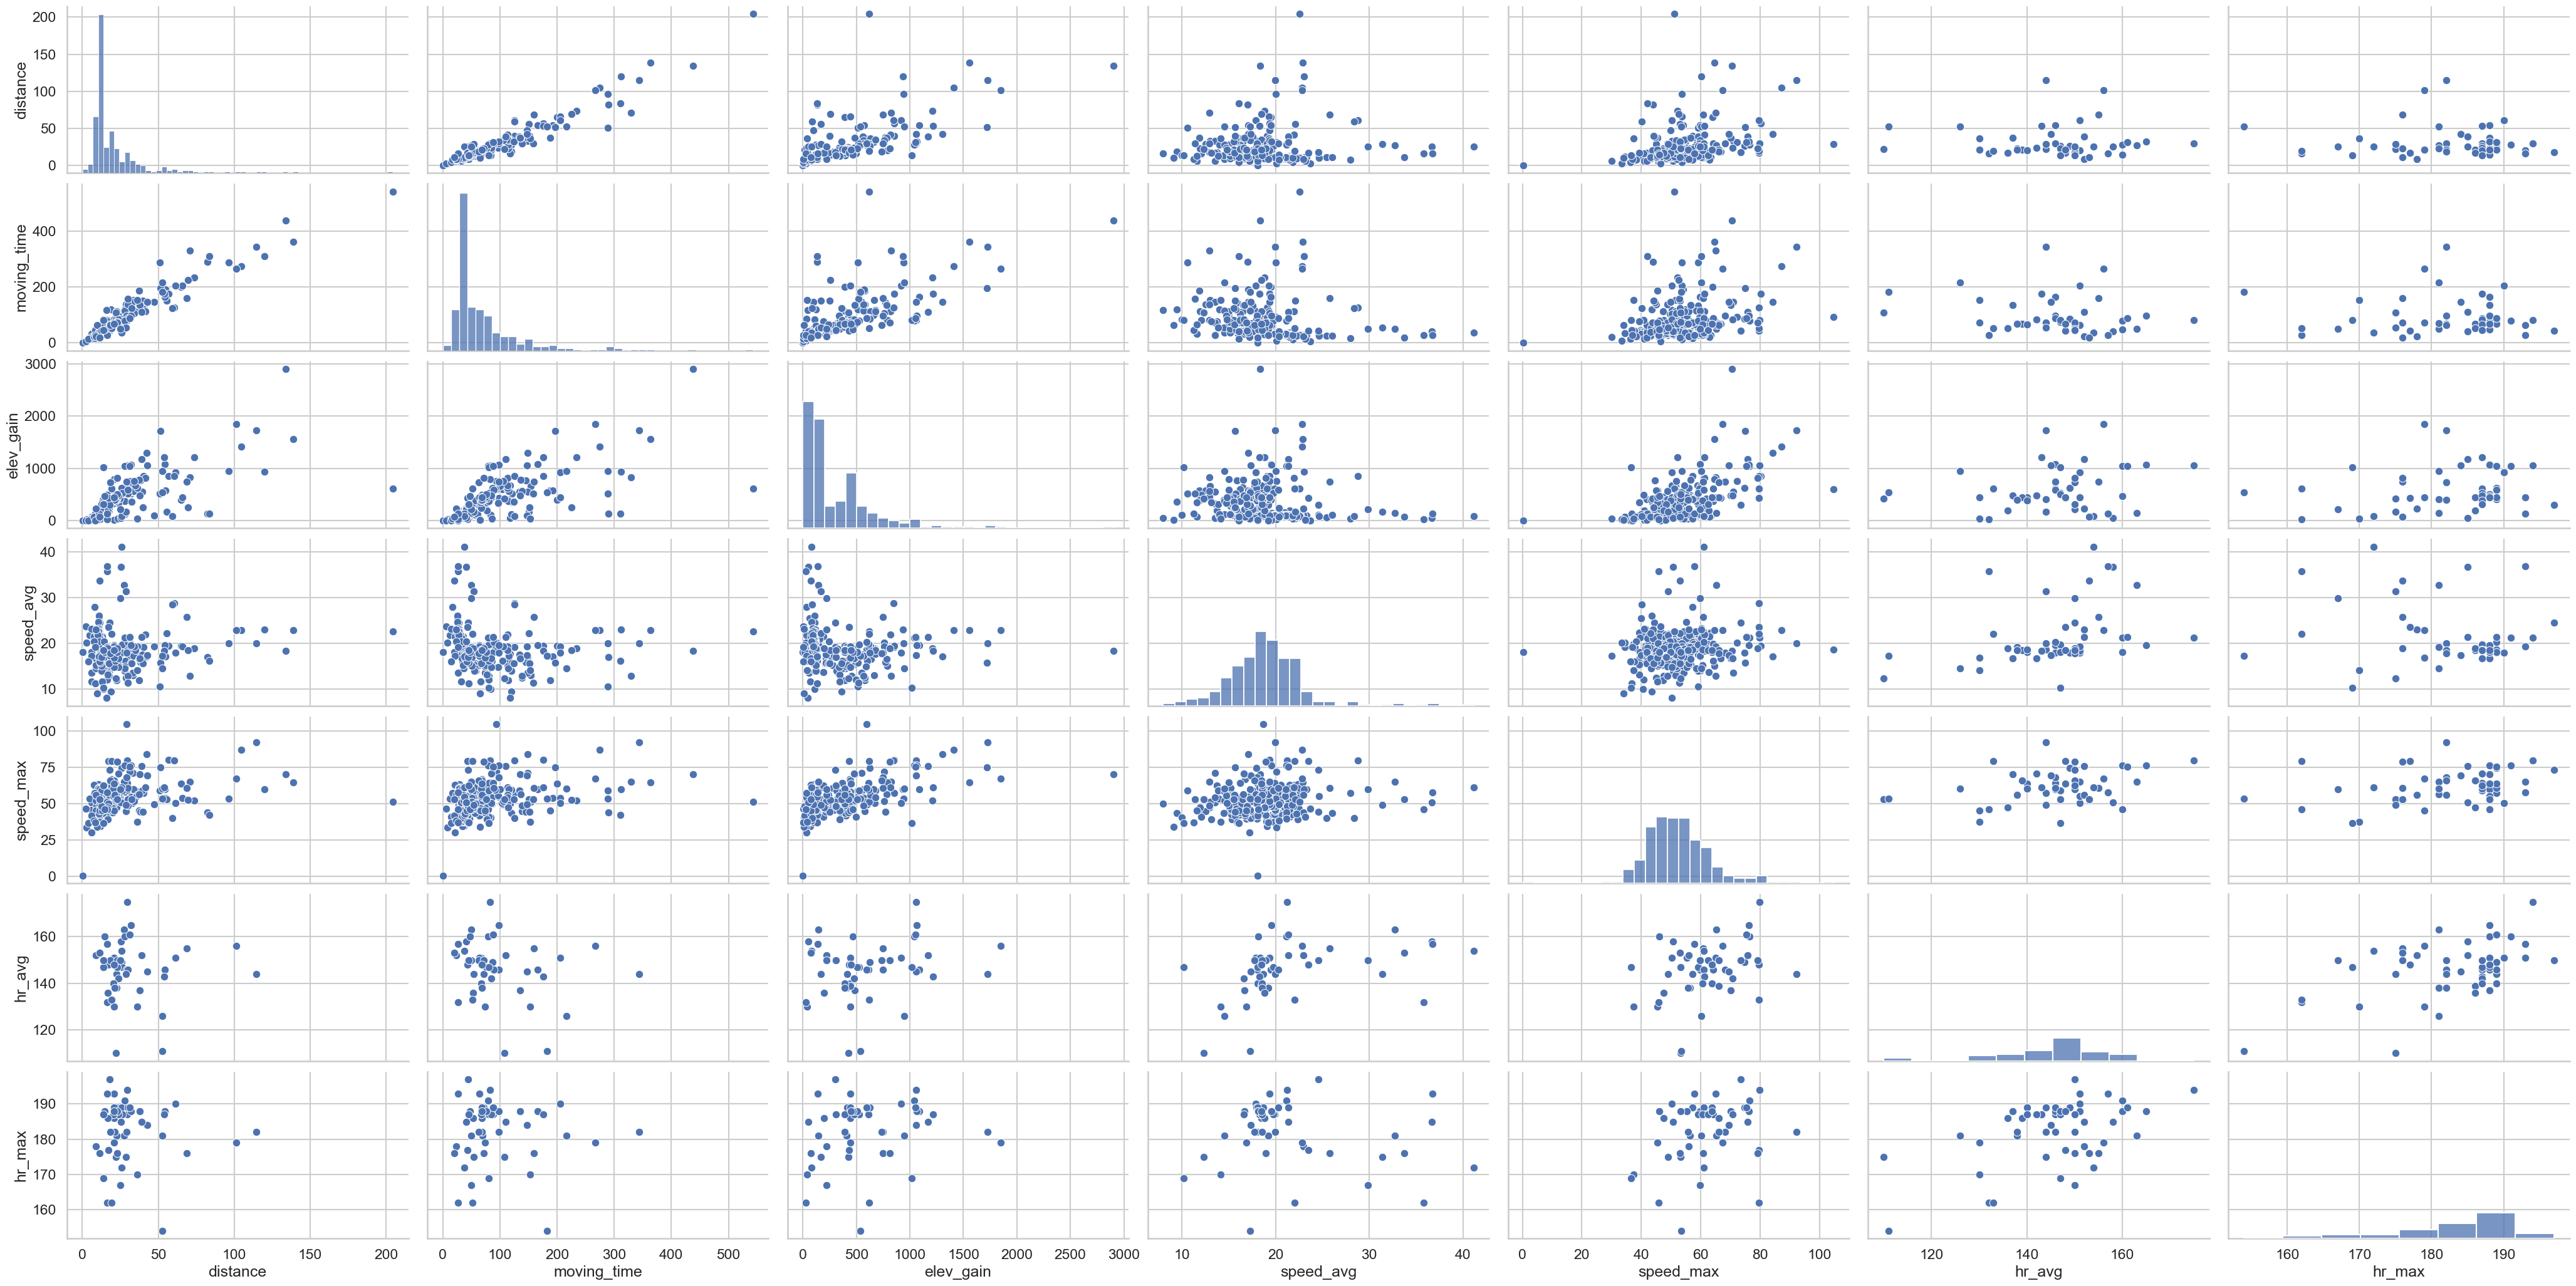

In [82]:
# Plotting the grid
sns.pairplot(filtered_data[PERFORMANCE_COLUMNS], height=3, aspect=2)

Is there a relationship between how far I ride and my average speed?

Text(0.5, 1.0, 'Average Speed vs Distance')

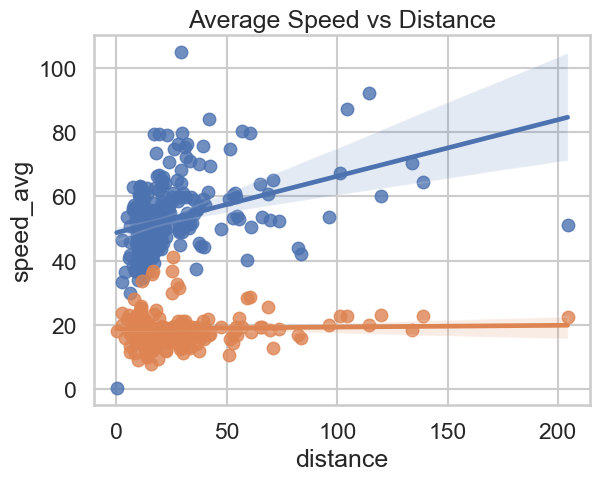

In [83]:
# Set the theme
sns.set_theme(style="whitegrid", context="talk")
# Plot the Max Speed
sns.regplot(x="distance", y="speed_max", data=filtered_data).set_title("Max Speed vs Distance")
# Plot the Average Speed
sns.regplot(x="distance", y="speed_avg", data=filtered_data).set_title("Average Speed vs Distance")

Top 10 activity by distance

In [84]:
# Get the table
filtered_data.sort_values(by="distance", ascending=False).head(10)[['date', 'name', 'distance']]

,date,name,distance
3080,2022-06-19,Balaton kör,204.42
3425,2023-05-21,Pilis vissza,138.90
3459,2023-06-24,Wolfsberg round 2 HC climb,134.12
3438,2023-06-03,Buba,119.75
3537,2023-09-08,Morning Ride,114.58
3137,2022-08-14,Kékes (Tour de Hongrie),104.61
3591,2023-11-01,Pilis classic,101.47
2823,2021-10-05,Dobogókő,96.39
2769,2021-08-13,Balaton Nyugat (Linda+Hanni),83.56
2768,2021-08-13,Morning Ride,82.32


Top 10 activity by elevation gain

In [85]:
# Get the table
filtered_data.sort_values(by="elev_gain", ascending=False).head(10)[['date', 'name', 'elev_gain']]

,date,name,elev_gain
3459,2023-06-24,Wolfsberg round 2 HC climb,2901.1
3591,2023-11-01,Pilis classic,1847.9
3537,2023-09-08,Morning Ride,1723.3
3154,2022-08-30,Sella Ronda,1720.3
3425,2023-05-21,Pilis vissza,1557.8
3137,2022-08-14,Kékes (Tour de Hongrie),1410.4
3157,2022-09-01,Sella Ronda with Canazei,1300.9
3570,2023-10-11,Afternoon Ride,1213.4
1748,2018-10-28,Tour de Buda,1208.7
3640,2023-12-18,Zwift - Steeper & Steeper on Tour of Fire and ...,1171.0
